# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#import data
import pickle
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import time

# TODO: fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = [X_train.shape[1], X_train.shape[2]]
image_size = X_train.shape[1]

# TODO: how many classes are in the dataset
n_classes = max(y_train)+1


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Image size = ", image_size)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Image size =  32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

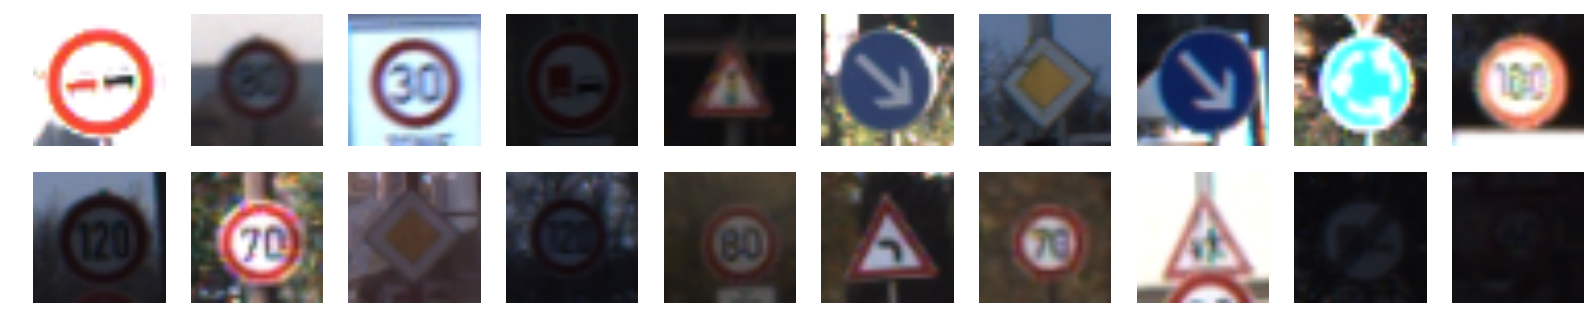

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#import cv2
import numpy as np
import matplotlib.image as mpimg

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(20,20))
for i in range(0,20):
    ### plot at random images in the training dataset
    ind = np.random.randint(0, n_train)
    ax1 = plt.subplot(gs1[i])
    #ax1.subtitle('test title', fontsize=20)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    #ax1.suptitle("#{}".format(ind))
    ax1.set_aspect('equal')
    img=X_train[ind,:,:]
    plt.subplot(10,10,i+1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

#### Plotted at random pictures in the training set

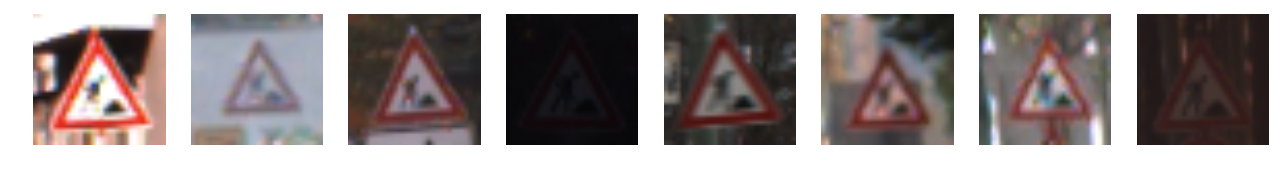

In [4]:
# How similiar are the images within one class
random_imgs = X_train[(y_train==25)]

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(20,20))
for i in range(0,8):
    ### plot at random images in the training dataset
    ind = np.random.randint(0, len(random_imgs))
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img=X_train[ind,:,:]
    plt.subplot(10,10,i+1)
    imgplot = plt.imshow(random_imgs[ind])
    plt.axis('off')
plt.show()

#### Plotted pictures within the same class - many of them are darked and barely can distingue their type 

### Plots

Many images are very dark and is not easy to understand what sign represents. Thus the preprocessing step must definetely take care of this!

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

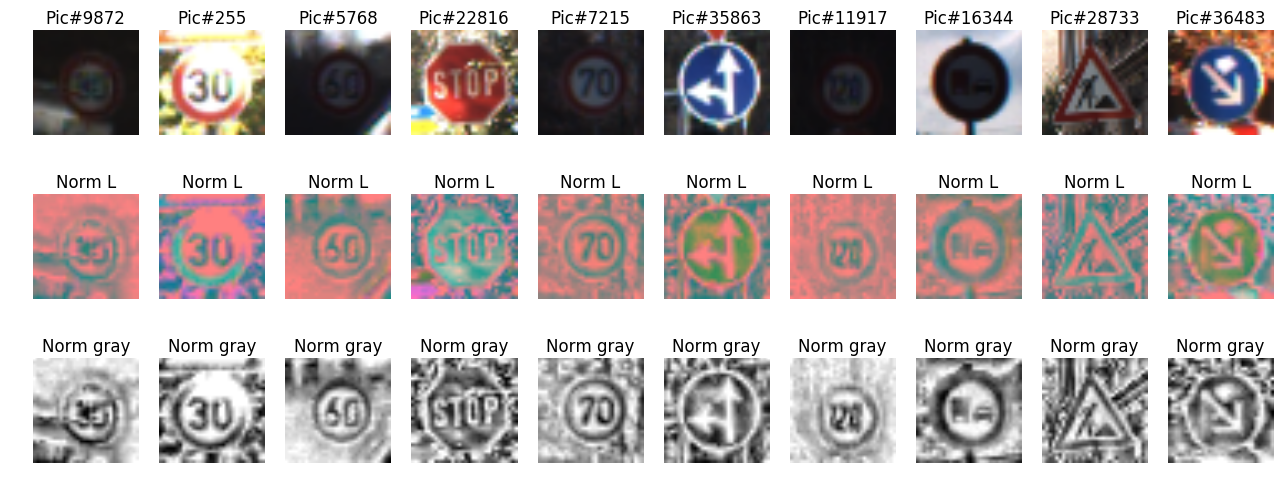

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def rgb2gray(rgb):
    #np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY) 

# Apply a Contrast Limited Adaptive Histogram Equalization on a LAB image
def clahe_lab(rgb):
    #converting image to lab color
    lab=cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    return cv2.merge((cl,a,b))

def clahe_bw(img_bw):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img_bw)

num_images = 10
f, axarr = plt.subplots(3, num_images, figsize=(16,6))
for i in range(num_images):
    ind = np.random.randint(len(X_train))
    img = X_train[ind]
    axarr[0][i].set_title("Pic#{}".format(ind))
    axarr[0][i].imshow(img)
    axarr[0][i].axis('off')
    
    img_lab=clahe_lab(img)
    axarr[1][i].imshow(img_lab)
    axarr[1][i].set_title("Norm L")
    axarr[1][i].axis('off')
    
    img_gray=clahe_bw(rgb2gray(img))
    axarr[2][i].imshow(img_gray,cmap='gray')
    axarr[2][i].set_title("Norm gray")
    axarr[2][i].axis('off')
plt.show()

#### Following Yann LeCun's approach from `Traffic Sign Recognition with Multi-Scale Convolutional Networks` , I will apply the Contrast Limited Adaptive Histogram Equalization to the Y channel on YUV-spaced images

In [6]:
def clahe_yuv(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6,6))
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    yuv[:,:,0] = clahe.apply(yuv[:,:,0])
    return yuv

def norm_yuv(img):
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])
    return yuv

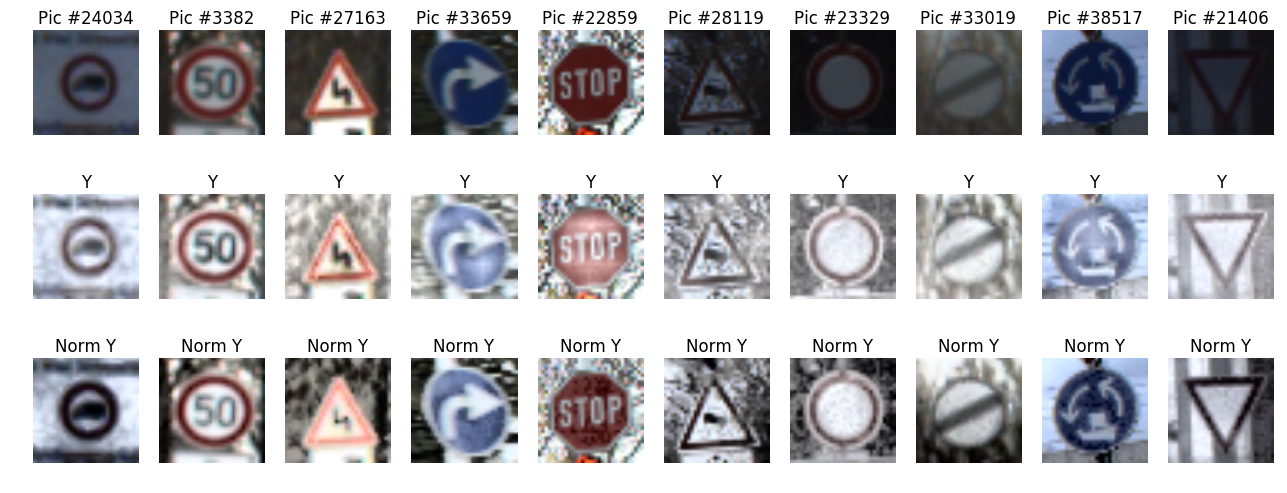

In [32]:
num_images = 10
f, axarr = plt.subplots(3, num_images, figsize=(16,6))
for i in range(num_images):
    ind = np.random.randint(len(X_train))
    img = X_train[ind]
    axarr[0][i].set_title("Pic #{}".format(ind))
    axarr[0][i].imshow(img)
    axarr[0][i].axis('off')
    
    img_yuv=clahe_yuv(img)
    img_yuv_show=cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    axarr[1][i].imshow(img_yuv_show)
    axarr[1][i].set_title("Y")
    axarr[1][i].axis('off')
    
    img_norm=norm_yuv(img)
    img_norm_show=cv2.cvtColor(img_norm, cv2.COLOR_YUV2RGB)
    axarr[2][i].imshow(img_norm_show)
    axarr[2][i].set_title("Norm Y")
    axarr[2][i].axis('off')
plt.show()

###### In the above pictures the Contrast Limited Adaptive Histogram Equalization gives better results than a simple histrogram equalization. The image is divided into small blocks called "tiles" (tileSize set to 6x6 ). Each of these blocks are histogram equalized. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1267759e8>]], dtype=object)

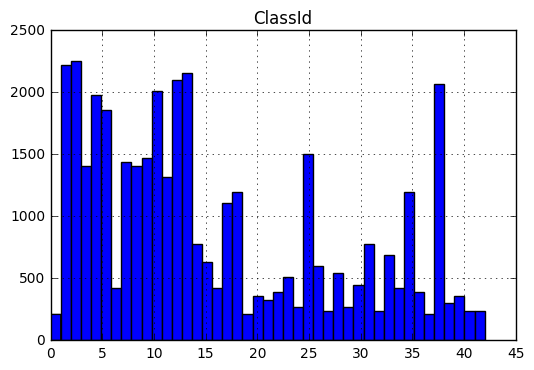

In [8]:
import pandas as pd
labels = pd.read_csv('signnames.csv')
labels_train = pd.DataFrame(y_train, columns=['ClassId'])
labels_test = pd.DataFrame(y_test, columns=['ClassId'])

labels_train.hist(bins = n_classes)

### In the above plot it can be seen that there is an imbalance between different sign data.  For example the number of training images for Seed limit 20km/h is much less than Speed Limit 30km/h or 50km/h. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12675b908>]], dtype=object)

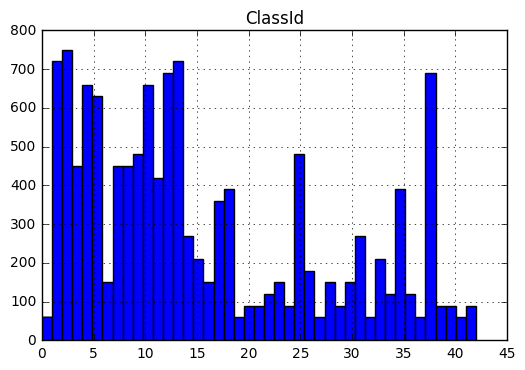

In [9]:
labels_test.hist(bins = n_classes)

### More or less a similar distribution of the sign images for the testing data as well.

#### One approach in creating a more balanced dataset is to generate `fake data`. This can be achieved by applying different scaling, rotation and translation transformation to the original traffic signs. As in [http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf]

In [10]:
def fake_image(img, shift_limit=2, scale_limit=.1, rotation_limit=15, random_state=np.random.RandomState()):
    # Samples are randomly perturbed 
    # in position ([-2,2] pixels), 
    # in scale ([.9,1.1] ratio) 
    # and rotation ([-15,+15] degrees)
    
    # See http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
    # See http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html
    rows, cols, _ = img.shape
    
    # Define transformation parameters
    shiftX, shiftY = random_state.randint(-shift_limit, shift_limit + 1, 2)
    scale = 1. + scale_limit - 2 * scale_limit * random_state.rand()
    rotation = random_state.randint(-rotation_limit, rotation_limit + 1)
    
    # Apply rotation and scaling
    rotation_scaling_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), rotation, scale)
    img_rotated = cv2.warpAffine(img, rotation_scaling_matrix, (cols, rows))
    
    # Apply shift
    shift_matrix = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    img_result = cv2.warpAffine(img_rotated, shift_matrix, (cols,rows))
    
    return img_result

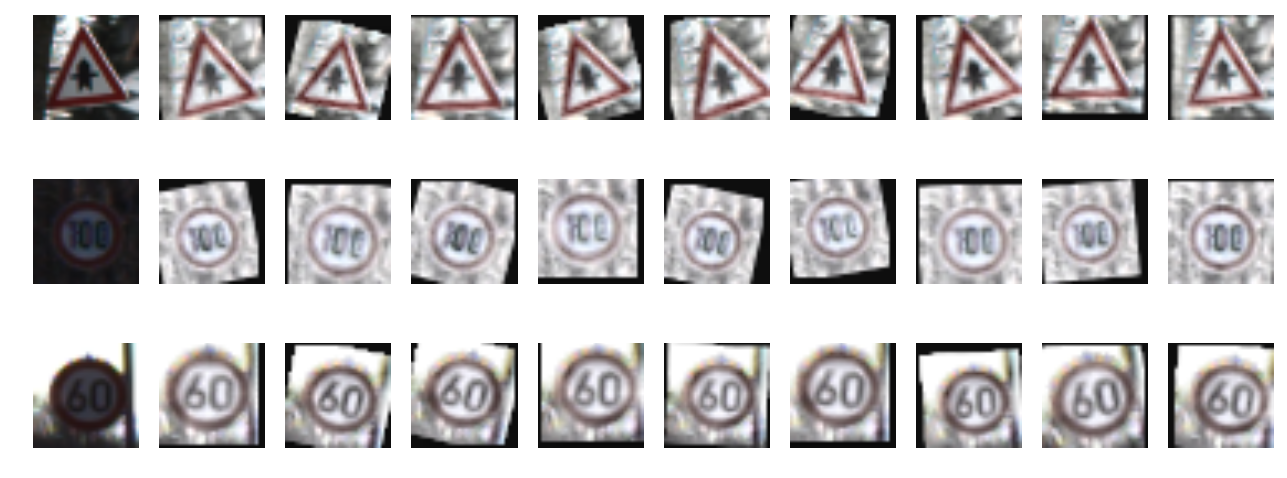

In [11]:
f, axarr = plt.subplots(3, num_images, figsize=(16,6))
for i in range(0,3):
    ind = np.random.randint(len(X_train))
    img = X_train[ind]
    axarr[i][0].imshow(img)
    axarr[i][0].axis('off')

    for j in range(1, 10):
        img_transformed = fake_image(img)
        img_normalized  = clahe_yuv(img_transformed)
        axarr[i][j].imshow(cv2.cvtColor(img_normalized, cv2.COLOR_YUV2RGB))
        axarr[i][j].axis('off')
plt.show()

In [12]:
RANDOM_STATE = np.random.RandomState(1234)

In [13]:
def get_new_data(X, y, N):
    assert len(X) == len(y)
    X_new, y_new = [], []
    
    for l in np.unique(y):
        X_existing = X[y == l].copy()        
        X_label = np.zeros([N, *X[0].shape], dtype=X.dtype)
        X_label[:len(X_existing)] = X_existing
        y_label = np.full([N], l, dtype=y.dtype)
        for idx in range(len(X_existing), N):
            sample_idx = RANDOM_STATE.randint(len(X_existing))
            X_label[idx] = fake_image(X_existing[sample_idx])
    
        X_new.append(X_label)
        y_new.append(y_label)
    
    return np.vstack(X_new), np.hstack(y_new)

In [14]:
X_new, y_new = get_new_data(X_train, y_train, 3000)

(array([ 3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,
         3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,
         3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,
         3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,
         3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,
         3000.,  3000.,  3000.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

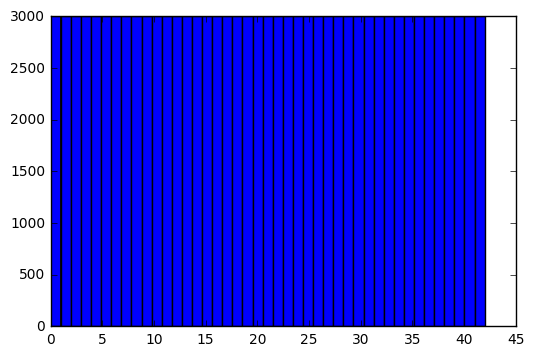

In [15]:
plt.hist(y_new, bins=43)

### Now we have an equal number of signes in each class (3000 of them per class - the maximum signes per class was around 2300).

### Model Architecture

### I will implement the LeNet architecture by Yann LeCun

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(np.arange(43).reshape(-1, 1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [17]:
X_train_given, X_val, y_train_given, y_val = train_test_split(
    X_train, y_train, test_size=.2, random_state=RANDOM_STATE, stratify=y_train
)
print(X_train_given.shape)
print(X_val.shape)

(31367, 32, 32, 3)
(7842, 32, 32, 3)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [18]:
def LeNet(x, keep_prob):
    mu, sigma = 0, .1

    # 32x32x3
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean=mu, stddev=sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(16), name='conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # 16x16x6
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean=mu, stddev=sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(32), name='conv2_b')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # 8x8x16
    fc1 = tf.contrib.layers.flatten(conv2)
    fc1_shape = (fc1.get_shape().as_list()[-1], 256)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean=mu, stddev=sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(256), name='fc1_b')
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    # 120
    fc2_W = tf.Variable(tf.truncated_normal(shape=(256, 43), mean=mu, stddev=sigma), name='fc2_W')
    fc2_b = tf.Variable(tf.zeros(43), name='fc2_b')
    return tf.matmul(fc1, fc2_W) + fc2_b

In [19]:
def train_and_evaluate_model(model, data, epochs, batch_size, dropout=0.5, filename=None):
    # Define all basic elements for model training and evaluation
    tf.reset_default_graph()
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.float32, (None, 43))
    keep_prob = tf.placeholder(tf.float32)
    logits = model(x, keep_prob)
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
    opt = tf.train.AdamOptimizer()
    train_op = opt.minimize(loss_op)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Helper function for model evaluation on val/test sets
    def eval_data(X_data, y_data):
        y_encoded = one_hot_encoder.transform(y_data.reshape(-1, 1)).toarray()
        steps_per_epoch = len(X_data) // batch_size
        num_examples = steps_per_epoch * batch_size
        total_acc, total_loss = 0, 0
        sess = tf.get_default_session()
        for step in range(steps_per_epoch):
            start, end = step * batch_size, (step + 1) * batch_size
            batch_x, batch_y = X_data[start:end], y_encoded[start:end]
            loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_acc += (acc * batch_x.shape[0])
            total_loss += (loss * batch_x.shape[0])
        return total_loss/num_examples, total_acc/num_examples
    
    saver = tf.train.Saver()
    # Train the model with intermediate evaluations on val set and final one on test set
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        steps_per_epoch = len(data['X_train']) // batch_size
        
        # Train model
        indices = np.arange(len(data['X_train']))
        for i in range(epochs):
            start_epoch = time.time()
            # on each epoch shuffle the data
            np.random.shuffle(indices)
            X_shuffled = data['X_train'][indices]
            y_shuffled = data['y_train'][indices]
            y_shuffled = one_hot_encoder.transform(y_shuffled.reshape(-1, 1)).toarray()
            
            # train on batches
            for step in range(steps_per_epoch):
                start, end = step * batch_size, (step + 1) * batch_size
                batch_x, batch_y = X_shuffled[start:end], y_shuffled[start:end]
                sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            end_training = time.time()

            # evaluate epoch
            val_loss, val_acc = eval_data(data['X_val'], data['y_val'])
            print("EPOCH {} ... train time {:.3f}s".format(i+1, end_training - start_epoch))
            print("Validation loss = {:.3f}, accuracy = {:.3f}".format(val_loss, val_acc))
            print()
            
        # evaluate on the test data
        test_loss, test_acc = eval_data(data['X_test'], data['y_test'])
        print("Test loss = {:.3f}, accuracy = {:.3f}".format(test_loss, test_acc))
        
        if filename is not None:
            saver = tf.train.Saver()
            saver.save(sess, filename, global_step=epochs)
            print("Model saved")
        return test_acc

In [20]:
results = {}

In [21]:
datasets = {
    'X_train': X_train_given,
    'X_val':   X_val,
    'X_test':  X_test,
    'y_train': y_train_given,
    'y_val':   y_val,
    'y_test':  y_test
}
# Let it be a baseline
data_given_normalized = {
    'X_train': datasets['X_train'].astype(np.float32) / 255.,
    'X_val': datasets['X_val'].astype(np.float32) / 255.,
    'X_test': datasets['X_test'].astype(np.float32) / 255.,
    'y_train': datasets['y_train'],
    'y_val': datasets['y_val'],
    'y_test': datasets['y_test'],
}

In [22]:
results['lenet_given_norm'] = train_and_evaluate_model(LeNet, data_given_normalized, 30, 64,filename='lenet')

EPOCH 1 ... train time 77.055s
Validation loss = 0.313, accuracy = 0.921

EPOCH 2 ... train time 73.279s
Validation loss = 0.137, accuracy = 0.968

EPOCH 3 ... train time 63.264s
Validation loss = 0.095, accuracy = 0.977

EPOCH 4 ... train time 55.184s
Validation loss = 0.105, accuracy = 0.975

EPOCH 5 ... train time 66.360s
Validation loss = 0.066, accuracy = 0.986

EPOCH 6 ... train time 63.334s
Validation loss = 0.092, accuracy = 0.977

EPOCH 7 ... train time 61.269s
Validation loss = 0.075, accuracy = 0.982

EPOCH 8 ... train time 56.073s
Validation loss = 0.070, accuracy = 0.982

EPOCH 9 ... train time 54.929s
Validation loss = 0.051, accuracy = 0.993

EPOCH 10 ... train time 56.256s
Validation loss = 0.062, accuracy = 0.987

EPOCH 11 ... train time 58.489s
Validation loss = 0.047, accuracy = 0.991

EPOCH 12 ... train time 586.016s
Validation loss = 0.079, accuracy = 0.982

EPOCH 13 ... train time 100.525s
Validation loss = 0.074, accuracy = 0.987

EPOCH 14 ... train time 64.651s


#### The final architecture is similar to the LeCun architecture showed in class. 

#### INPUT -> CONV1 -> RELU -> POOL1 -> CONV2 -> RELU -> POOL2 -> FC1 -> FC2 -> SOFTMAX

#### CONV1 has 16 filters of 5x5 size with 1/1 strides and SAME padding, while CONV2 has 32 filters with similar configuration. 
#### POOL1 and POOL2 have 2/2 size and 2/2 stride which gives 0.5 width and height in output.
#### The FC layer has 256 neurons.

#### I used AdamOptimizer with default starting learning rate parameter 0.001.  I used batch size of 64 and dropout value of 0.5, no L1/L2 regularization used

#### Final model was trained for 30 epochs


#### The accuracy of the testing dataset is around 95.2% - increasing the number of epochs migh help getting an increase of 1-2% accuracy. 

In [ ]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(
    X_new, y_new, test_size=.2, random_state=RANDOM_STATE, stratify=y_new
)

In [ ]:
datasets = {
    'X_train': X_train_new,
    'X_val':   X_val_new,
    'X_test':  X_test,
    'y_train': y_train_new,
    'y_val':   y_val_new,
    'y_test':  y_test
}
# Let it be a baseline
data_new_normalized = {
    'X_train': datasets['X_train'].astype(np.float32) / 255.,
    'X_val': datasets['X_val'].astype(np.float32) / 255.,
    'X_test': datasets['X_test'].astype(np.float32) / 255.,
    'y_train': datasets['y_train'],
    'y_val': datasets['y_val'],
    'y_test': datasets['y_test'],
}

In [ ]:
results['lenet_new_norm'] = train_and_evaluate_model(LeNet, data_new_normalized, 1, 64,filename='lenet')

#### When using a more balanced dataset the results are improving, however it comes at a computational cost.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

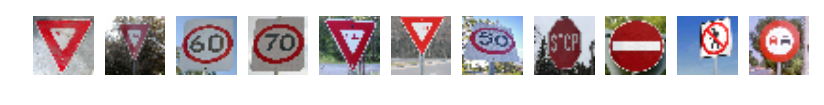

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

n_web_images = 11
web_images = np.zeros((n_web_images, 32, 32, 3), dtype=np.uint8)
for n in range(n_web_images):
    img =  cv2.resize(cv2.cvtColor(cv2.imread('pics_web/{}.jpg'.format(n)), cv2.COLOR_BGR2RGB), (32, 32))
    web_images[n] = img
    
f, axarr = plt.subplots(1, n_web_images, figsize=(10,2))
for i in range(n_web_images):
    axarr[i].imshow(web_images[i])
    axarr[i].axis('off')

#### Pictures at differnt resolutions were collected from the web - all of them have been resized and normalized

### Predict the Sign Type for Each Image

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
for i in range(len(web_images)):
    web_images[i] = cv2.cvtColor(clahe_yuv(web_images[i]), cv2.COLOR_YUV2RGB)
web_images = web_images.astype(np.float32) / 255.


### Analyze Performance

In [33]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

def get_probs_from_saved_model(model, data):
    tf.reset_default_graph()
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.float32, (None, 43))
    keep_prob = tf.placeholder(tf.float32)
    logits = model(x, keep_prob)
    probs = tf.nn.softmax(logits)
    topk = tf.nn.top_k(probs, 5)

    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, 'lenet-30')
        return sess.run([probs, topk], feed_dict={x: data, keep_prob: 1.0})


In [34]:
probs, topk = get_probs_from_saved_model(LeNet, web_images)
probs = probs.argmax(1)

In [35]:
for i in range(n_web_images):
    print(labels.at[probs[i], 'SignName'])

Yield
Yield
Speed limit (60km/h)
Speed limit (60km/h)
Yield
Priority road
Priority road
Road work
Speed limit (20km/h)
Speed limit (50km/h)
No vehicles


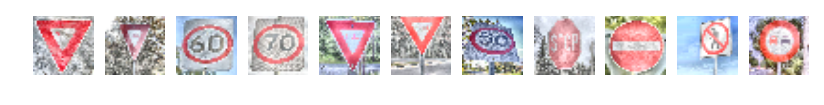

In [36]:
f, axarr = plt.subplots(1, n_web_images, figsize=(10,2))
for i in range(n_web_images):
    axarr[i].imshow(web_images[i])
    axarr[i].axis('off')

#### While the yield sign was correctly classified 3/4, the rest were misslabed. Many of the speed limit signs were not correctly classified. However, looking at the top 5 softmax probabilities, we can see that the second or third there is a small chance to get it right.

#### Some of the missclasification is all due to the fact that I used the unbalanced dataset. 
#### It is also interesting to see how confident (100%) the classifier is when for certain `yields` signs

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [30]:
for i in range(n_web_images):
    for k in range(5):
        prob = topk.values[i][k]
        clss = topk.indices[i][k]
        print("{}: {} ({:.2f}%)".format(k + 1, labels.at[clss, 'SignName'], prob * 100.))
    print()

1: Yield (100.00%)
2: Stop (0.00%)
3: Speed limit (100km/h) (0.00%)
4: Speed limit (30km/h) (0.00%)
5: No passing (0.00%)

1: Yield (90.76%)
2: Speed limit (60km/h) (5.79%)
3: Road work (2.27%)
4: Speed limit (50km/h) (0.72%)
5: Ahead only (0.20%)

1: Speed limit (20km/h) (59.50%)
2: Speed limit (80km/h) (22.25%)
3: Speed limit (30km/h) (15.20%)
4: Speed limit (50km/h) (1.54%)
5: Speed limit (60km/h) (0.87%)

1: Speed limit (30km/h) (63.69%)
2: Speed limit (20km/h) (35.07%)
3: Speed limit (50km/h) (1.11%)
4: Speed limit (100km/h) (0.06%)
5: Speed limit (80km/h) (0.04%)

1: Yield (100.00%)
2: Speed limit (50km/h) (0.00%)
3: Speed limit (60km/h) (0.00%)
4: No passing for vehicles over 3.5 metric tons (0.00%)
5: Speed limit (80km/h) (0.00%)

1: Priority road (99.97%)
2: Right-of-way at the next intersection (0.02%)
3: Speed limit (30km/h) (0.01%)
4: Road work (0.00%)
5: Bicycles crossing (0.00%)

1: Wild animals crossing (68.05%)
2: No passing (20.70%)
3: No passing for vehicles over 3.5 

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Conclusions

#### The model is doing a decent job in classifying the test dataset, but struggles with the new pictures. Improvement can be definetely be made, considering the large literature in sign classification. A more complex architecture, such as VGG or Inception probably would outperform LeNet. 